In [46]:
# importing all the library 
# all are not used but i have still kept to avoid errors
import pandas as pd
import math
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn import neighbors, metrics,datasets,svm,linear_model, tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from scipy.stats.mstats import gmean
from sklearn.tree import DecisionTreeClassifier,plot_tree
from numpy import mean,std
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,ParameterGrid,GridSearchCV,train_test_split
from scipy.io import arff
from sklearn.svm import SVC
from sklearn import linear_model
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from tensorflow import keras


import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K



Use the Fashion MNIST dataset. This can be accessed from Tensorflow/Keras (See lab example)
1. Use the train and test datasets as provided.
2. Transform the images into 1) a vector representation appropriate for MLP; 2) a tensor
representation for a 2D-CNN for both train and test sets.
3. Train a CNN on the 2D training set, and a MLP network on the 1D training set.
4. Evaluate each network on their respective test sets. Report the training and testing accuracy in
a table for both the MLP and CNN models.
5. Discuss your observations (which should discuss the observations made as you experimented and
observations about the results) 

In [47]:
test = pd.read_csv('C:/Users/Dhruv Jain/Downloads/fashion-mnist_test.csv')
train = pd.read_csv('C:/Users/Dhruv Jain/Downloads/fashion-mnist_train.csv')

In [48]:
train.info()
test.info()
print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
(60000, 785)
(10000, 785)


In [49]:
y_train = train['label'].values
X_train = train.drop("label", axis=1)
X_train = X_train.values

y_test = test['label'].values
X_test = test.drop("label", axis=1)
X_test = X_test.values

In [50]:
# We have to convert it to Image form
X_train_reshape = X_train.reshape(60000, 28, 28, 1)
X_test_reshape = X_test.reshape(10000, 28, 28, 1)

In [51]:
# reshaping image dimensions
X_train_full = X_train_full.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

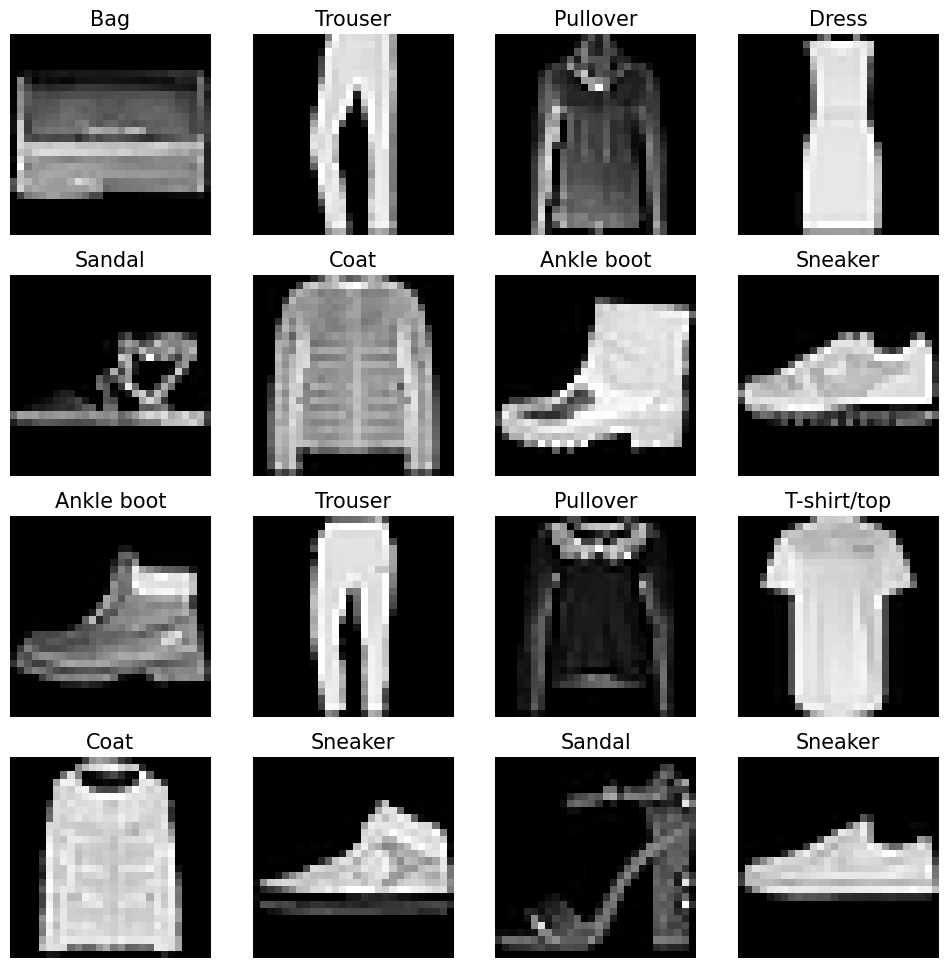

In [52]:
# visualizing random images from the training set
# import required packages and load the dataset

classes_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12,12))

for ax in axs.reshape(-1):
    idx = np.random.randint(60000)
    ax.set_title(classes_names[y_train_full[idx]], size=15)
    ax.axis('off')
    ax.imshow(X_train_full[idx], cmap="gray")

In [120]:
model = keras.models.Sequential()# model in keras
model.add(keras.layers.Flatten(input_shape=[28, 28]))# flatenize a image 
model.add(keras.layers.Dense(300, activation="relu"))# dense layer, activation funciton 
model.add(keras.layers.Dense(100, activation="relu"))# more complex patterns and images 
model.add(keras.layers.Dense(10, activation="softmax"))# softmax will return normalize value to 1. 

In [164]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [144]:
model.layers

In [145]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights

array([[ 0.0017012 , -0.02820372, -0.06284738, ..., -0.02520414,
        -0.05597089,  0.01538611],
       [-0.02075014,  0.04768035, -0.02019629, ..., -0.04447845,
         0.0660383 , -0.05368889],
       [-0.00632069, -0.0590073 , -0.04204999, ..., -0.0467043 ,
         0.04379239, -0.01161176],
       ...,
       [ 0.04841375,  0.05084243,  0.0733712 , ..., -0.00296564,
        -0.06333395,  0.06110524],
       [-0.01966664,  0.03049427,  0.01969211, ...,  0.01713869,
         0.07424244,  0.04681277],
       [-0.01254087,  0.01482306,  0.06275319, ...,  0.03963489,
         0.01701651,  0.02219508]], dtype=float32)

In [148]:
# repeating all the stuff again in single panel 

from sklearn.model_selection import train_test_split
y_train = train['label'].values
X_train = train.drop("label", axis=1)
X_train = X_train.values

y_test = test['label'].values
X_test = test.drop("label", axis=1)
X_test = X_test.values

X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [159]:
# layer are defines as below.
import tensorflow as tf
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(180),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(170),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(120),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
MLP_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 180)               141300    
                                                                 
 batch_normalization_15 (Bat  (None, 180)              720       
 chNormalization)                                                
                                                                 
 re_lu_15 (ReLU)             (None, 180)               0         
                                                                 
 dense_24 (Dense)            (None, 170)               30770     
                                                                 
 batch_normalization_16 (Bat  (None, 170)              680       
 chNormalization)                                     

In [160]:
MLP_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=["accuracy"])

In [161]:
# placing 10 values of epoches to find the best accuracy.
history = MLP_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6458 - accuracy: 0.7808 - val_loss: 0.4279 - val_accuracy: 0.8453
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.8544 - val_loss: 0.3682 - val_accuracy: 0.8670
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3714 - accuracy: 0.8703 - val_loss: 0.3617 - val_accuracy: 0.8683
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3358 - accuracy: 0.8806 - val_loss: 0.3338 - val_accuracy: 0.8782
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3115 - accuracy: 0.8879 - val_loss: 0.3739 - val_accuracy: 0.8569
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2941 - accuracy: 0.8940 - val_loss: 0.3976 - val_accuracy: 0.8656
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2798 - accuracy: 0.8995 - val_loss: 0.3123 - val_accuracy: 0.8847
Epoch 

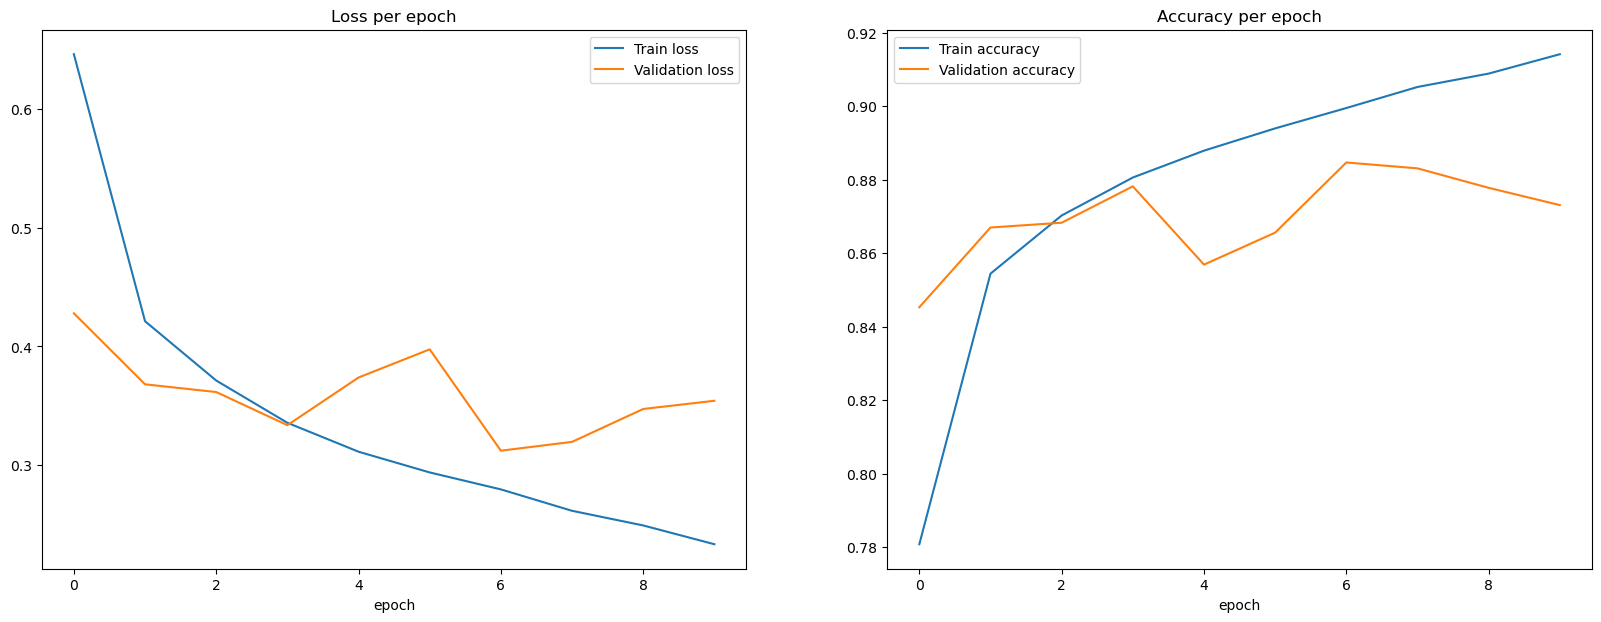

In [162]:
def plotting_results(history):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

    ax1.plot(history['loss'], label="Train loss")
    ax1.plot(history['val_loss'], label="Validation loss")
    ax2.plot(history['accuracy'], label="Train accuracy")
    ax2.plot(history['val_accuracy'], label="Validation accuracy")
    
    ax1.legend()
    ax2.legend()

    ax1.set_title('Loss per epoch')
    ax1.set_xlabel("epoch")
    ax2.set_title('Accuracy per epoch')
    ax2.set_xlabel("epoch")
    
plotting_results(history.history)
# plotting the graph below

In [163]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.9074


[0.2501944303512573, 0.9074000120162964]

CNN

In [103]:
# making cnn model with some layers using con2d,batch size normalizaiton , relu,max poll 
#and the same function with different inputs
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=[28,28,1], padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)      

In [104]:
CNN_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=["accuracy"])

In [105]:
history = CNN_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
375/375 [==============================] - 17s 44ms/step - loss: 0.5659 - accuracy: 0.8076 - val_loss: 0.8306 - val_accuracy: 0.7102
Epoch 2/10
375/375 [==============================] - 19s 50ms/step - loss: 0.3612 - accuracy: 0.8754 - val_loss: 0.3410 - val_accuracy: 0.8719
Epoch 3/10
375/375 [==============================] - 19s 51ms/step - loss: 0.3068 - accuracy: 0.8919 - val_loss: 0.2835 - val_accuracy: 0.8938
Epoch 4/10
375/375 [==============================] - 20s 52ms/step - loss: 0.2777 - accuracy: 0.9025 - val_loss: 0.2611 - val_accuracy: 0.9066
Epoch 5/10
375/375 [==============================] - 20s 53ms/step - loss: 0.2538 - accuracy: 0.9108 - val_loss: 0.2431 - val_accuracy: 0.9087
Epoch 6/10
375/375 [==============================] - 20s 52ms/step - loss: 0.2322 - accuracy: 0.9177 - val_loss: 0.2462 - val_accuracy: 0.9092
Epoch 7/10
375/375 [==============================] - 21s 55ms/step - loss: 0.2215 - accuracy: 0.9217 - val_loss: 0.2335 - val_accuracy:

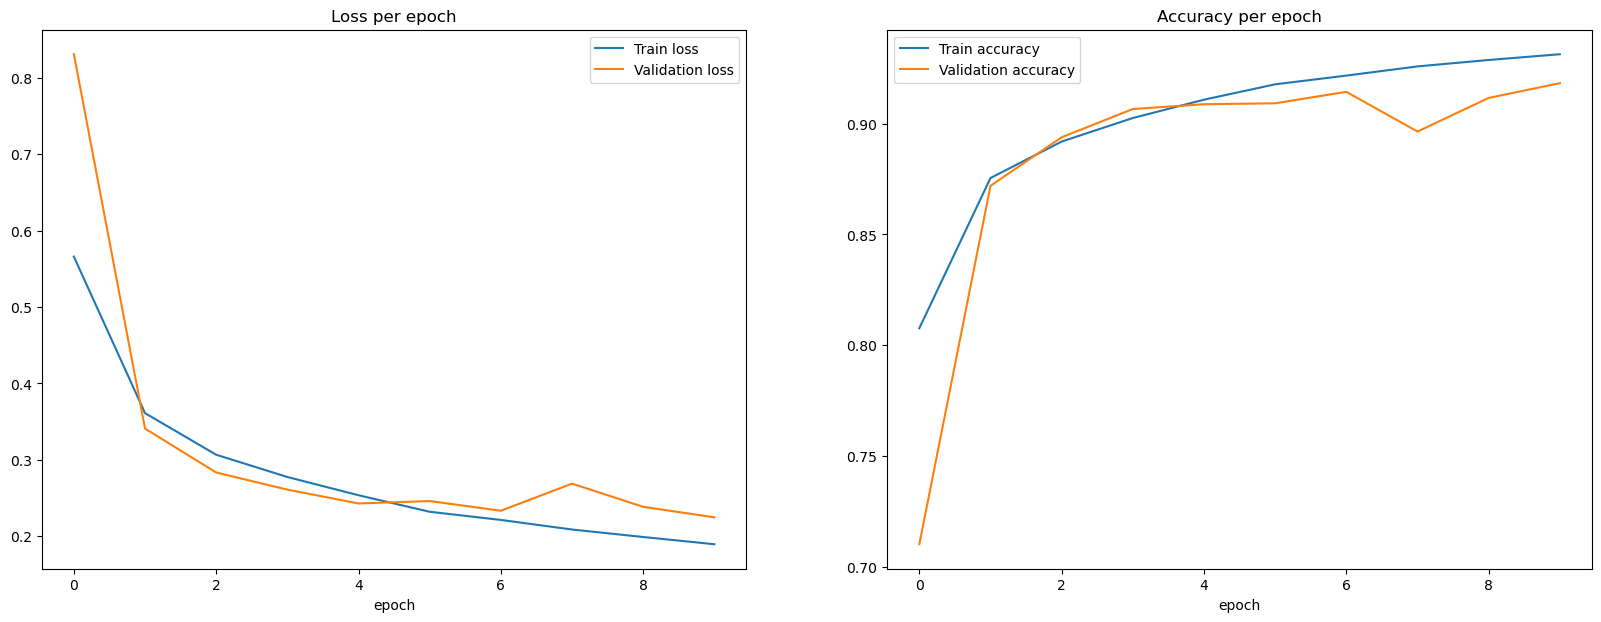

In [106]:
plotting_results(history.history)
# plotting the graph below

In [107]:
CNN_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2126 - accuracy: 0.9240


[0.21260017156600952, 0.9240000247955322]